In [102]:
import utils
import pandas as pd
import datetime as dt
import pprint
import matplotlib.pyplot as plt
from sklearn import tree, model_selection


df = pd.read_csv("Sessionized_SquarePanda.csv", error_bad_lines=False)
df


,childid,session_id,createdat,gamename,minutes_since_last_interval,new_event_boundary
0,1004,0,2016-11-07 20:34:00,Lagoon,NaN,0
1,1005,0,2016-11-07 20:52:00,Lagoon,NaN,0
2,1005,0,2016-11-07 20:53:00,Lagoon,1.0,0
3,1005,0,2016-11-07 20:54:00,Lagoon,1.0,0
4,1010,0,2016-11-08 00:45:00,Bubbles,NaN,0
5,1010,1,2016-11-10 00:07:00,Bubbles,2842.0,1
6,1010,2,2016-11-12 12:40:00,Bubbles,3633.0,1
7,1010,2,2016-11-12 12:52:00,Bubbles,12.0,0
8,1010,3,2016-11-17 00:14:00,Bowling,6442.0,1
9,1010,3,2016-11-17 00:15:00,Bowling,1.0,0


In [103]:
df_1 = df.groupby(df['childid']).last()
df_1

,session_id,createdat,gamename,minutes_since_last_interval,new_event_boundary
childid,,,,,
183,3,2017-01-02 18:54:00,Lagoon,8.0,0
188,2,2017-01-30 06:26:00,Bowling,22.0,0
189,2,2017-05-29 00:08:00,Jiggity Jamble,43.0,1
191,4,2017-04-28 18:23:00,Lagoon,4.0,0
193,4,2016-11-25 19:33:00,Bubbles,24484.0,1
194,0,2016-08-09 19:05:00,Bowling,NaN,0
196,3,2016-07-19 20:00:00,Lagoon,8.0,0
197,1,2016-07-16 17:58:00,Lagoon,819.0,1
198,8,2017-07-05 21:45:00,Lagoon,2595.0,1


In [4]:
#from matplotlib import pyplot as plt
#from matplotlib import style
#style.use('ggplot')
#x1=df_1.index.values
#y1=df_1['session_id']

#plt.scatter(x1,y1,color='g')
#plt.title('childid v/s sessionid')
#plt.xlabel('Child ID')
#plt.ylabel('No of Sessions')
#plt.ylim(0,100)
#plt.figure(figsize=(200,150))
#plt.show()



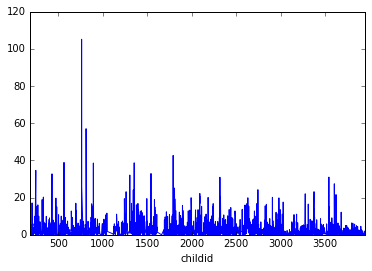

In [104]:
df_1=df.groupby(['childid'])['session_id'].mean()
df_1.plot.line(x='childid',y='session_id')
plt.show()

### Average number of sessions per user is 10.2765

In [105]:
df.groupby(['childid'])['session_id'].count().mean()
#df.groupby(['childid'])['session_id'].count().plot(x=df.childid,y=df.session_id.count(),kind='bar')


#df_1.plot(x=df_1.index,y=df_1['session_id'])
#plt.show()

43.087431693989068

### Average number of activities per session is 43

# Lets find how many unique games a child plays per session

## Lets make a groupby object for each childid and a particular sessionid and find all unique games for that session for that child

In [113]:
df.groupby(['childid','session_id'])['gamename'].nunique()

childid  session_id
183      0             1
         1             1
         2             2
         3             2
188      0             1
         1             1
         2             1
189      0             1
         1             1
         2             1
191      0             2
         1             1
         2             2
         3             1
         4             2
193      0             1
         1             1
         2             2
         3             2
         4             1
194      0             1
196      0             1
         1             1
         2             1
         3             1
197      0             1
         1             1
198      0             1
         1             1
         2             1
                      ..
3923     0             1
3924     0             3
3925     0             1
3927     0             2
3928     0             2
3929     0             2
3930     0             2
3931     0             2
3934 

# To confirm our values let's check manually as below

In [89]:
df.loc[df['childid'] == 183]

,childid,session_id,createdat,gamename,minutes_since_last_interval,new_event_boundary
25559,183,0,2016-11-10 14:46:00,Lagoon,NaN,0
25560,183,1,2016-11-11 02:26:00,Bubbles,700.0,1
25561,183,1,2016-11-11 02:27:00,Bubbles,1.0,0
25562,183,1,2016-11-11 02:33:00,Bubbles,6.0,0
25563,183,1,2016-11-11 02:35:00,Bubbles,2.0,0
25564,183,1,2016-11-11 02:38:00,Bubbles,3.0,0
25565,183,2,2016-11-11 14:20:00,Bubbles,702.0,1
25566,183,2,2016-11-11 14:29:00,Bubbles,9.0,0
25567,183,2,2016-11-11 14:50:00,Lagoon,21.0,0
25568,183,3,2017-01-02 18:46:00,Bubbles,75116.0,1


## For childid 183 the no of unique games per session perfectly matches our results